## Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
- Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
- Get all the episode names, whose average rating is more than 8 for every season
- Get all the episode names that aired before May 2019
- Get the episode name from each season with the highest and lowest rating
- Get the summary for the most popular ( ratings ) episode in every season

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df  = pd.read_csv("Dataset/westworld.csv")

In [12]:
df.head(2)

,id,url,name,season,number,_links_self_href,_links_show_href,airdate,airstamp,airtime,image_medium,image_original,rating_average,runtime,summary,type
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,https://api.tvmaze.com/episodes/869671,https://api.tvmaze.com/shows/1371,2016-10-02,2016-10-03 01:00:00+00:00,09:00:00 PM,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,8.0,68,A woman named Dolores is a free spirit in the ...,regular
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,https://api.tvmaze.com/episodes/911201,https://api.tvmaze.com/shows/1371,2016-10-09,2016-10-10 01:00:00+00:00,09:00:00 PM,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,7.7,60,Bernard suspects that someone is sabotaging th...,regular


## 1. Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [110]:
df_1=df.groupby('season')['rating_average'].mean().reset_index()
df_1

,season,rating_average
0,1,8.0900
1,2,8.0000
2,3,7.7750
3,4,7.5375


<AxesSubplot:xlabel='season', ylabel='rating_average'>

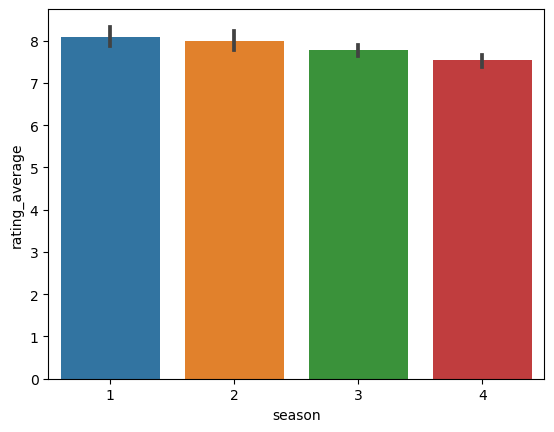

In [111]:
sns.barplot(df['season'],df['rating_average'])

## 2. Get all the episode names, whose average rating is more than 8 for every season

In [30]:
df[df['rating_average']>8][['name','season','number']].rename(columns={'number':'Episode Number'})

,name,season,Episode Number
6,Trompe L'Oeil,1,7
8,The Well-Tempered Clavier,1,9
9,The Bicameral Mind,1,10
17,Kiksuya,2,8
18,Vanishing Point,2,9
19,The Passenger,2,10


## 3. Get all the episode names that aired before May 2019

In [37]:
df[df['airdate']<'2019-05-01'][["name","airdate"]]

,name,airdate
0,The Original,2016-10-02
1,Chestnut,2016-10-09
2,The Stray,2016-10-16
3,Dissonance Theory,2016-10-23
4,Contrapasso,2016-10-30
5,The Adversary,2016-11-06
6,Trompe L'Oeil,2016-11-13
7,Trace Decay,2016-11-20
8,The Well-Tempered Clavier,2016-11-27
9,The Bicameral Mind,2016-12-04


## 4. Get the episode name from each season with the highest and lowest rating

In [48]:
df.groupby('season')['season'].count()

season
1    10
2    10
3     8
4     8
Name: season, dtype: int64

In [53]:
list(df['season'].unique())

[1, 2, 3, 4]

In [70]:
for i in list(df['season'].unique()):
    print("Highest rating from season: ",i)
    print(df[df['season'] ==i][["name","rating_average"]].sort_values(by="rating_average",ascending=False).head(1),"\n")
    print("lowest rating from season: ",i)
    print(df[df['season'] ==i][["name","rating_average"]].sort_values(by="rating_average",ascending=False).tail(1))
    print('-'*50)

Highest rating from season:  1
                 name  rating_average
9  The Bicameral Mind             8.7 

lowest rating from season:  1
        name  rating_average
2  The Stray             7.6
--------------------------------------------------
Highest rating from season:  2
       name  rating_average
17  Kiksuya             8.7 

lowest rating from season:  2
            name  rating_average
14  Akane No Mai             7.6
--------------------------------------------------
Highest rating from season:  3
            name  rating_average
20  Parce Domine             8.0 

lowest rating from season:  3
           name  rating_average
26  Passed Pawn             7.5
--------------------------------------------------
Highest rating from season:  4
        name  rating_average
32  Zhuangzi             7.8 

lowest rating from season:  4
            name  rating_average
28  The Auguries             7.1
--------------------------------------------------


## 5. Get the summary for the most popular ( ratings ) episode in every season

In [109]:
for i in list(df['season'].unique()):
    print("Highest rating summary from season: ",i)
    print(df[df['season'] ==i][["summary","rating_average"]].sort_values(by="rating_average",ascending=False)['summary'].head(1),"\n")
    print('-'*50)

Highest rating summary from season:  1
9    Delores finds out the truth about William's fa...
Name: summary, dtype: object 

--------------------------------------------------
Highest rating summary from season:  2
17    Another of Westworld's Host revolutionaries is...
Name: summary, dtype: object 

--------------------------------------------------
Highest rating summary from season:  3
20    If you're stuck in a loop, try walking in a st...
Name: summary, dtype: object 

--------------------------------------------------
Highest rating summary from season:  4
32    God is bored.
Name: summary, dtype: object 

--------------------------------------------------
